#DEVFEST SOUSSE 2024 - XAI Unleashed – Bringing Clarity to the Complex World of AI

> **To highlight the advantages of Explainable AI (XAI) over standard AI models, let's create two models:**

*   A Basic AI Model (using a simple classifier).
*   An XAI-Enhanced Model (same classifier but with explanations using SHAP and LIME).

For this example, we’ll use a dataset like the UCI Heart Disease dataset, which is widely used for classification tasks, predicting whether a patient is likely to have heart disease based on various health metrics.

We'll demonstrate these models with a logistic regression classifier to keep things straightforward.

Code Outline:
Basic Model – Train a logistic regression model and check the prediction accuracy without explanations.
XAI-Enhanced Model – Train the same logistic regression model but add SHAP and LIME explainability methods to interpret individual predictions.


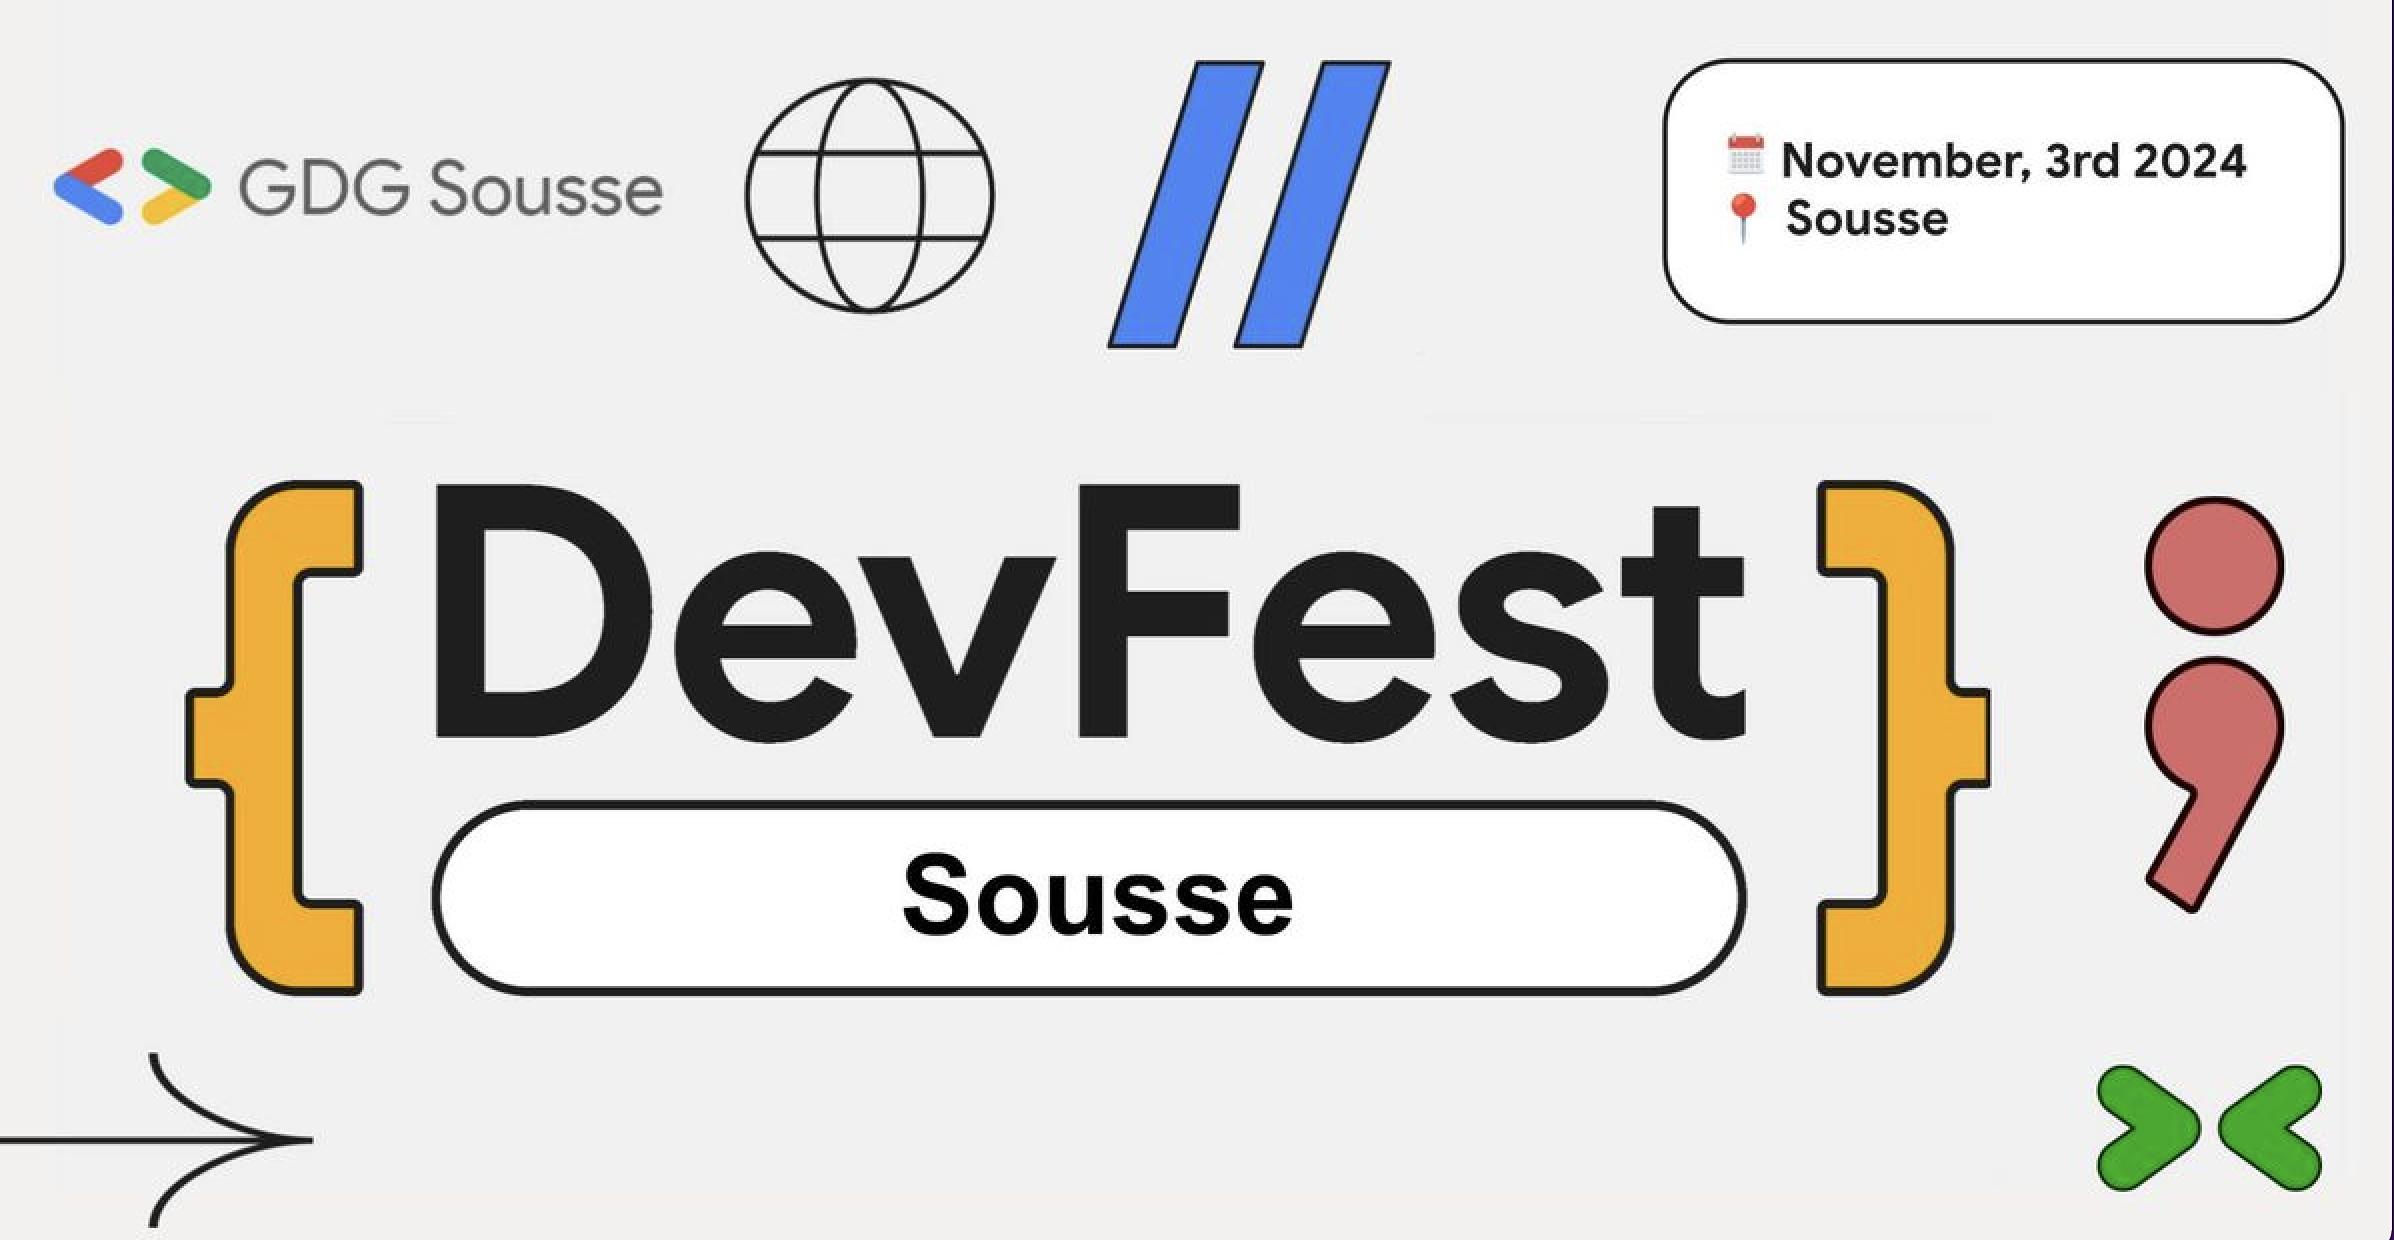

In [19]:
pip install lime

In [20]:
pip install shap

#Basic AI Model (without XAI)

* we are going to Train a logistic regression model and check the prediction accuracy without explanations.
* This model provides a single accuracy score but lacks insight into why the model makes certain predictions.




In [21]:
#Basic Model we are going to Train a logistic regression model and check the prediction accuracy without explanations.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris   # For demonstration; replace with heart disease dataset

#For this example, we’ll use a dataset like the UCI Heart Disease dataset, which is widely used for classification tasks,
# predicting whether a patient is likely to have heart disease based on various health metrics.

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
basic_model = LogisticRegression(max_iter=1000)
basic_model.fit(X_train, y_train)
y_pred = basic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Basic Model Accuracy: {accuracy * 100:.2f}%")


Basic Model Accuracy: 100.00%


#XAI-Enhanced Model (with SHAP and LIME)
* let’s use SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-Agnostic Explanations) to interpret this model.

**1/Using SHAP**

> This SHAP visualization gives us a breakdown of each feature's contribution to a particular prediction, providing a clear understanding of the model's decision-making.





Model Accuracy: 100.00%


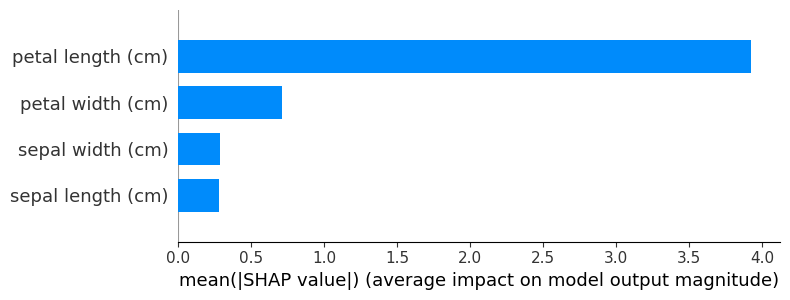

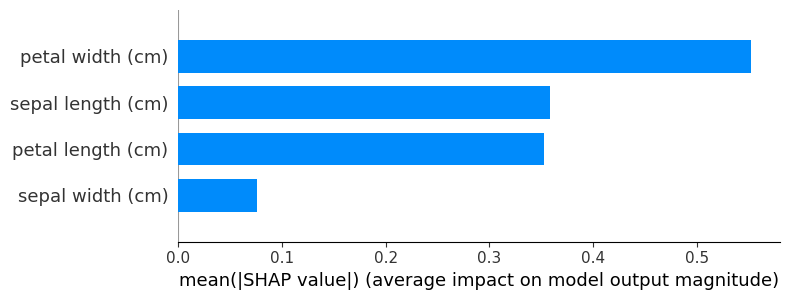

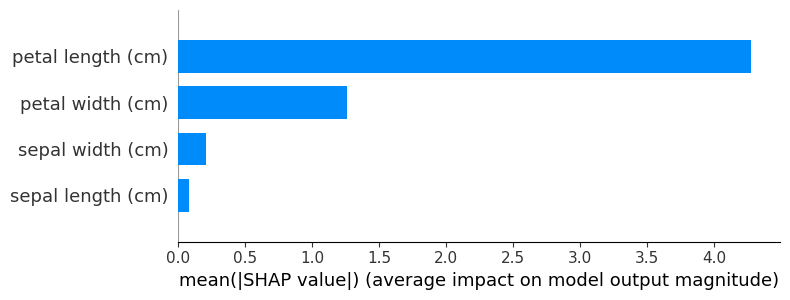

In [22]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # For demonstration; replace with your dataset if available
import shap

# Load dataset (using Iris for simplicity; replace with Heart Disease or another dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
xai_model = LogisticRegression(max_iter=1000)
xai_model.fit(X_train, y_train)

# Evaluate model accuracy on test data
y_pred = xai_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# SHAP Explainability
# Initialize SHAP explainer
explainer_shap = shap.Explainer(xai_model, X_train)

# Compute SHAP values for test data
shap_values = explainer_shap(X_test)

# Visualize SHAP values for a single prediction (for the first test instance)
shap.initjs()

# Define the instance index to explain
instance_index = 0  # Adjust if needed

# Get the expected values for each class
expected_values = explainer_shap.expected_value

# Instead of slicing shap_values directly, use .values property and select class:
shap.force_plot(expected_values[0], shap_values.values[instance_index, :, 0], X_test.iloc[instance_index])
# shap_values.values maintains the Explanation structure
# [instance_index, :, 0] selects the desired instance and class for the first class


# Plot for each class separately to create a clearer view
for class_index in range(len(expected_values)):
    shap.summary_plot(shap_values[:, :, class_index], X_test, plot_type="bar", title=f"Class {class_index}")
    # shap_values[:, :, class_index] selects all instances, all features for a single class

2/ Using LIME


> The LIME output will show how each feature contributes to the final prediction for a specific instance, explaining the local behavior of the model.



In [18]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from lime.lime_tabular import LimeTabularExplainer

# Load dataset (using Iris for simplicity; replace with Heart Disease or another dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
xai_model = LogisticRegression(max_iter=1000)
xai_model.fit(X_train, y_train)

# Evaluate model accuracy on test data
y_pred = xai_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Create LIME explainer
explainer_lime = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Setosa', 'Versicolor', 'Virginica'],  # Modify based on target names
    mode='classification'
)

# Choose an instance to explain (e.g., the first test instance)
i = 0  # First instance in the test set

# Get the instance as a DataFrame with proper column names
instance_to_explain = pd.DataFrame([X_test.iloc[i].values], columns=X_test.columns)

# Use the DataFrame in explain_instance
exp = explainer_lime.explain_instance(instance_to_explain.values[0], xai_model.predict_proba, num_features=5)

# Show explanation in notebook
exp.show_in_notebook(show_all=False)


Model Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#Summary
Basic Model: Simple and gives an accuracy score but lacks interpretability.
XAI-Enhanced Model: By using SHAP and LIME, we gain insights into how individual features impact predictions, providing transparency and helping users trust and validate model decisions.
By comparing the two, we can see how XAI techniques give more interpretability, making the model's decisions more transparent and actionable.






